In [17]:
import pandas as pd

"""Plotting libraries"""
import seaborn as sns
import matplotlib.pyplot as plt

"""Detecting outliers"""
from sklearn.datasets import load_boston

""""Regular expression module"""
import re

"""Natural language toolkit(Used for stopwords and lemmatization)"""
import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

"""Word cloud module"""
import wordcloud
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to C:\Users\Pranav
[nltk_data]     Naranatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Pranav
[nltk_data]     Naranatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Pranav
[nltk_data]     Naranatt\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<AxesSubplot: xlabel='target', ylabel='Count'>

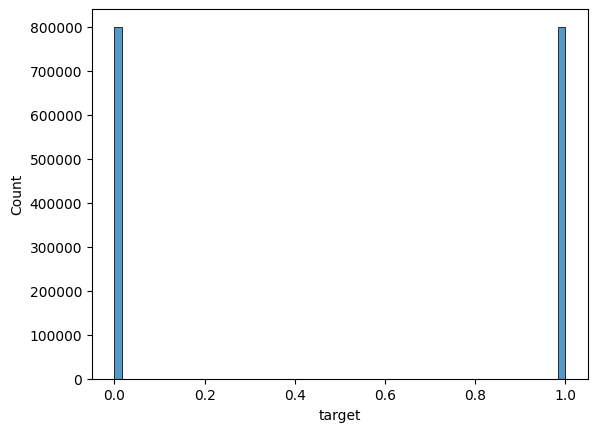

In [2]:
"""Reading and organizing data"""
df=pd.read_csv("D:/ThirdYearFiles/FifthSemesterFiles/IntroductiontoDataScience/Project/Database/SuicideSquad.csv", encoding='latin-1')
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.replace(4, 1, True, False)
#print(df.isnull().sum())

"""histogram plot"""
sns.histplot(x='target', data=df)



In [4]:
"""Cleaning and replacing null values"""
#print(df.isnull().sum())
#No null values

stop_words = stopwords.words('english')
def cleanTweet(text):
    cleanedTweets = []
    
    for tweets in text:
        #Converting text to lowercase
        tweets = tweets.lower()

        #Removing newline breaks
        tweets = re.sub(r'\n', '', tweets)
        
        #Removing URLs
        tweets = re.sub(r"(?:\|http?\://|https?\://|www)\S+", "", tweets)
        
        #Removing @usernames
        tweets = re.sub('@[^\s]+','', tweets)
        
        #Removing punctuations, numbers & special characters
        tweets = re.sub("[^a-zA-Z]", " ", tweets)
        
        #Removing emojis
        tweets = re.compile("["
                   u"U0001F600-U0001F64F"  # emoticons
                   u"U0001F300-U0001F5FF"  # symbols & pictographs
                   u"U0001F680-U0001F6FF"  # transport & map symbols
                   u"U0001F1E0-U0001F1FF"  # flags (iOS)
                   u"U00002702-U000027B0"
                   u"U000024C2-U0001F251"
                               "]+", flags=re.UNICODE).sub(r'', tweets)
        
        finaltweet = ''
        #Removing short words(with length less than 3) & stop words
        temp = tweets.split()
        stop_words = stopwords.words('english')
        stop_words = stop_words + ['hi', 'im', 'amp', 'quot']
        textwithoutstopwords = [word for word in temp if not word in stop_words and len(word)>2]
        
        #Lemmatization
        lem = WordNetLemmatizer()
        lemmatizedText = [lem.lemmatize(y) for y in textwithoutstopwords]
        finaltweet = ' '.join(lemmatizedText)
        cleanedTweets.append(finaltweet)
    return cleanedTweets

df['text'] = cleanTweet(df['text'])
print(df['text'].head())    

0    upset update facebook texting might cry result...
1         dived many time ball managed save rest bound
2                      whole body feel itchy like fire
3                                     behaving mad see
4                                           whole crew
Name: text, dtype: object


<AxesSubplot: xlabel='target', ylabel='flag'>

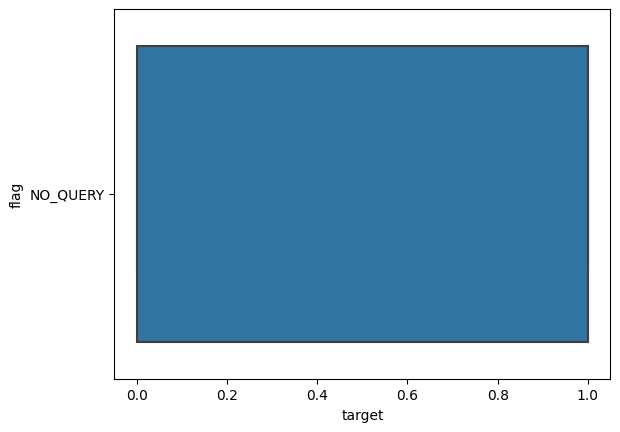

In [9]:
"""box plot"""
sns.boxplot(x='target', y='flag', data=df)
#plt.show()

<AxesSubplot: xlabel='target', ylabel='flag'>

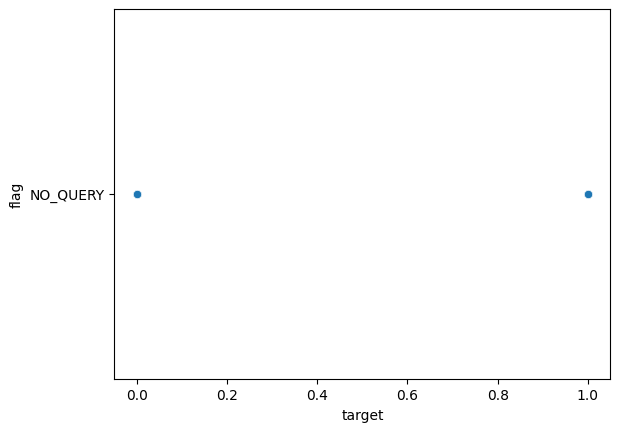

In [10]:
"""scatterplot"""
sns.scatterplot( x="target", y='flag', data=df)

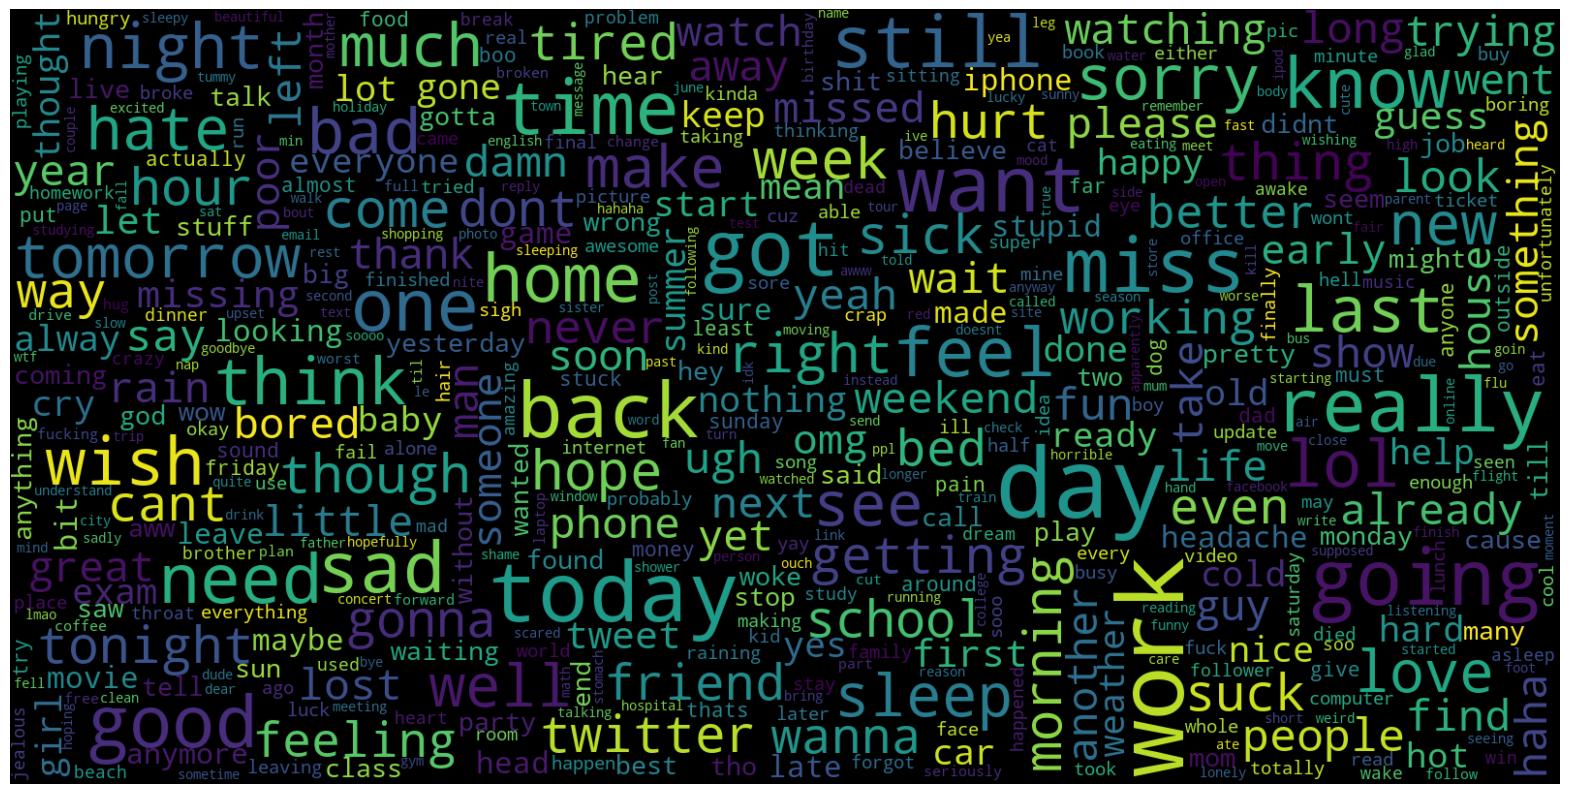

In [18]:
#Word Clud Negative Words
all_words = " ".join([tweet for tweet in df['text'][df['target']==0]])

wordcloud = WordCloud(max_words = 500, width=1600, height=800, collocations = False, max_font_size=100).generate(all_words)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()